In [42]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras

In [2]:
image_size=256
batchsize=32
dataset= tf.keras.preprocessing.image_dataset_from_directory('PlantVillage',shuffle=True,image_size=(image_size,image_size),batch_size=batchsize)

Found 2152 files belonging to 3 classes.


In [3]:
class_names= dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [4]:
len(dataset)

68

In [5]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    

(32, 256, 256, 3)
[1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 2 0 1 1 0 2 0 1 1 1 1 1]


(-0.5, 255.5, 255.5, -0.5)

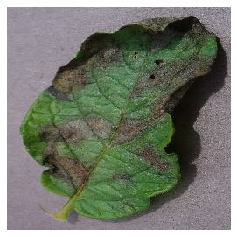

In [6]:
plt.matshow(image_batch[0].numpy().astype('uint8'))
plt.axis('off')

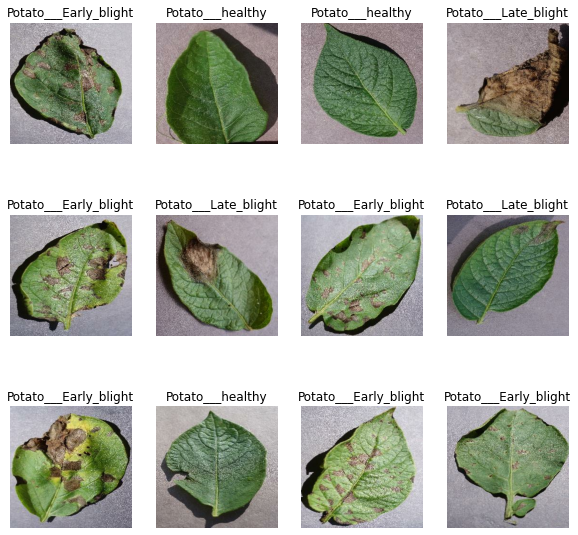

In [7]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')
        

In [8]:
len(dataset)

68

In [9]:
train_size= .80
len(dataset)*train_size


54.400000000000006

In [10]:
train_ds= dataset.take(54)
len(train_ds)

54

In [11]:

test_ds= dataset.skip(54)
len(test_ds)

14

In [12]:
val_size= .10
len(dataset)*val_size

6.800000000000001

In [13]:
val_ds= test_ds.take(6)
len(val_ds)

6

In [14]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [15]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [16]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [17]:
resizing_and_rescaling=tf.keras.Sequential([layers.experimental.preprocessing.Resizing(image_size,image_size),
                    layers.experimental.preprocessing.Rescaling(1.0/256)])


In [18]:
data_agumentation=tf.keras.Sequential([ layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical")
    ,layers.experimental.preprocessing.RandomRotation(0.2)
])

In [19]:
CHANNELS=3
input_shape = (batchsize,image_size,image_size, CHANNELS)
n_classes = 3

model = models.Sequential([
    resizing_and_rescaling,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [21]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [22]:
history=model.fit(train_ds,epochs=10,verbose=1,validation_data=val_ds,batch_size=batchsize)

Epoch 1/10
54/54 [==============================] - 256s 3s/step - loss: 0.8999 - accuracy: 0.5000 - val_loss: 0.9078 - val_accuracy: 0.4635
Epoch 2/10
54/54 [==============================] - 173s 3s/step - loss: 0.6869 - accuracy: 0.7043 - val_loss: 0.3762 - val_accuracy: 0.8229
Epoch 3/10
54/54 [==============================] - 176s 3s/step - loss: 0.3465 - accuracy: 0.8524 - val_loss: 0.3472 - val_accuracy: 0.8750
Epoch 4/10
54/54 [==============================] - 183s 3s/step - loss: 0.3390 - accuracy: 0.8652 - val_loss: 0.3264 - val_accuracy: 0.8646
Epoch 5/10
54/54 [==============================] - 167s 3s/step - loss: 0.2436 - accuracy: 0.9005 - val_loss: 0.1764 - val_accuracy: 0.9167
Epoch 6/10
54/54 [==============================] - 169s 3s/step - loss: 0.2023 - accuracy: 0.9178 - val_loss: 0.0996 - val_accuracy: 0.9583
Epoch 7/10
54/54 [==============================] - 167s 3s/step - loss: 0.1997 - accuracy: 0.9219 - val_loss: 0.1268 - val_accuracy: 0.9375
Epoch 8/10
54

In [23]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 11s 1s/step - loss: 0.0559 - accuracy: 0.9766


In [24]:
scores

[0.055884949862957, 0.9765625]

In [25]:
history

In [26]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
type(history.history['loss'])

list

In [29]:
len(history.history['loss'])

10

In [30]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.8998519778251648,
 0.6869087815284729,
 0.3465019762516022,
 0.33904680609703064,
 0.24358604848384857]

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

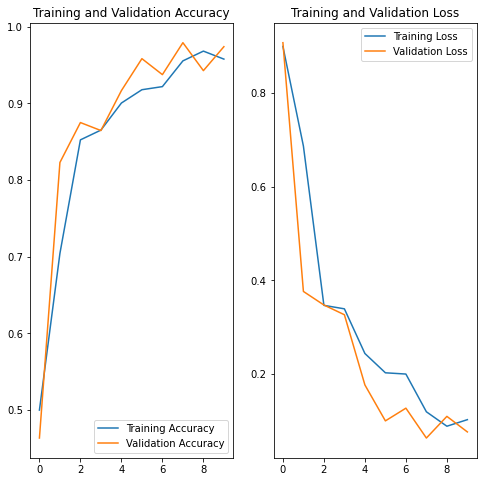

In [33]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
predicted label: Potato___Late_blight


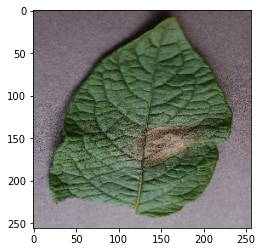

In [34]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [35]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

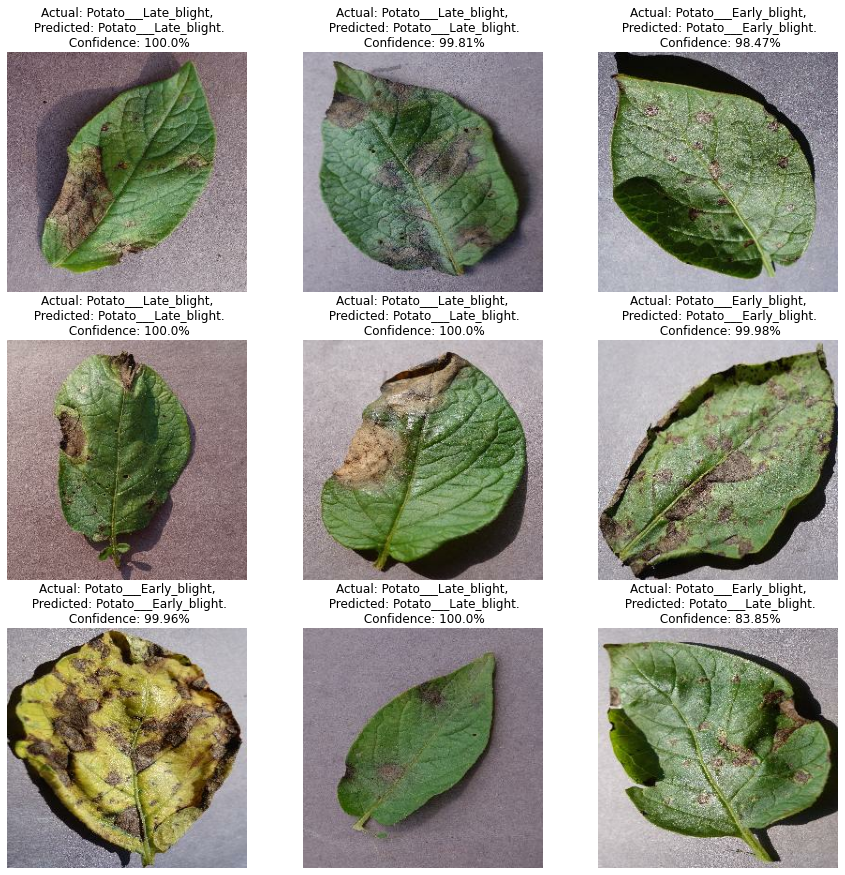

In [36]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [39]:
import os
cwd= os.getcwd()
print(cwd)

C:\Users\Inspiron\Tensorflow


In [41]:
import joblib

joblib.dump(model,'The_potato_disease_classification_model')

INFO:tensorflow:Assets written to: ram://a138bf77-78ed-4fbd-866f-5720dfff5790/assets


['The_potato_disease_classification_model']